# Artist data from Spotify API

### 1. Creating User Authentication

In [3]:
import requests
import json
import numpy as py
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.environ.get('SP_CLIENT_ID')
CLIENT_SECRET = os.environ.get('SP_CLIENT_SECRET')

AUTH_URL = 'https://accounts.spotify.com/api/token'
API_URL = 'https://api.spotify.com/v1/'

params = {
        'Content-Type': 'application/x-www-form-urlencoded',
        'grant_type': 'client_credentials',
          }

auth_response = requests.post(AUTH_URL, auth=(CLIENT_ID, CLIENT_SECRET), data=params)
access_token = auth_response.json()['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

### 2. Getting album info for Artist

In [10]:
artist_id = "0JyCM9EwjQZZzQPGTSM1qc"

album_data = requests.get(API_URL + 'artists/' + artist_id + '/albums', headers = headers, params={'include_groups': 'album', 'limit': 50} ).json()

### 3. Extracting track info from albums

In [11]:
tracks = []

for album in album_data["items"]:
    album_id = album["id"]
    
    track_data = requests.get(API_URL + "albums/" + album_id + "/tracks", headers = headers, params = {"limit": 50}).json()
    
    for track in track_data["items"]:
        track_features = requests.get(API_URL + "audio-features/" + track["id"], headers = headers).json()
        track_features.update({
            'track_name': track['name'],
            'album_name': album["name"],
            'release_date': album['release_date'],
            'album_id': album_id      
        })
        
        tracks.append(track_features)
    

### 4. Creating dataframe from track info

In [12]:
df = pd.DataFrame(tracks)
df.index = df["track_name"]
df = df.drop(columns = ["track_name"])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album_name,release_date,album_id
track_name,,,,,,,,,,,,,,,,,,,,,
Human Convention,0.593,0.808,10,-5.288,0,0.1870,0.16000,0.000030,0.1110,0.704,...,audio_features,0vFFcqvpwFMYVKVAYRLT5g,spotify:track:0vFFcqvpwFMYVKVAYRLT5g,https://api.spotify.com/v1/tracks/0vFFcqvpwFMY...,https://api.spotify.com/v1/audio-analysis/0vFF...,214442,3,Happy However After,2018-04-13,2cq60Wx5cTICqqlezQpwlA
Catch the Gleam,0.327,0.671,6,-5.525,0,0.0433,0.29300,0.000000,0.0910,0.179,...,audio_features,5Vh5tjFoYMp9wLQ2oumtdh,spotify:track:5Vh5tjFoYMp9wLQ2oumtdh,https://api.spotify.com/v1/tracks/5Vh5tjFoYMp9...,https://api.spotify.com/v1/audio-analysis/5Vh5...,335015,3,Happy However After,2018-04-13,2cq60Wx5cTICqqlezQpwlA
Let Me Be,0.648,0.918,5,-5.595,0,0.0584,0.02320,0.000000,0.1180,0.723,...,audio_features,6GgtvYLWu3krtZqbtDkM6w,spotify:track:6GgtvYLWu3krtZqbtDkM6w,https://api.spotify.com/v1/tracks/6GgtvYLWu3kr...,https://api.spotify.com/v1/audio-analysis/6Ggt...,311249,4,Happy However After,2018-04-13,2cq60Wx5cTICqqlezQpwlA
One in a Million,0.355,0.859,1,-6.391,1,0.0751,0.18100,0.000000,0.0956,0.487,...,audio_features,3yqmAfO5yDKGvYdI3aoP1c,spotify:track:3yqmAfO5yDKGvYdI3aoP1c,https://api.spotify.com/v1/tracks/3yqmAfO5yDKG...,https://api.spotify.com/v1/audio-analysis/3yqm...,248814,4,Happy However After,2018-04-13,2cq60Wx5cTICqqlezQpwlA
Smell of a Rose,0.647,0.899,0,-4.773,1,0.0610,0.00585,0.000006,0.3000,0.794,...,audio_features,6x5lfAXz7es5TUr29DhIDI,spotify:track:6x5lfAXz7es5TUr29DhIDI,https://api.spotify.com/v1/tracks/6x5lfAXz7es5...,https://api.spotify.com/v1/audio-analysis/6x5l...,230257,4,Happy However After,2018-04-13,2cq60Wx5cTICqqlezQpwlA


### 5. Sorting data by date

In [13]:
df["release_date"] = pd.to_datetime(df["release_date"])

### 6. Graphing some things

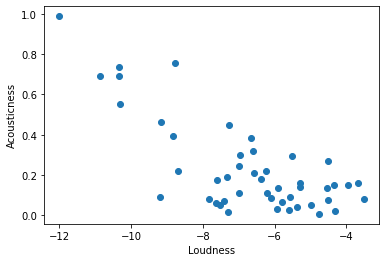

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df["loudness"], df["acousticness"])
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.show()

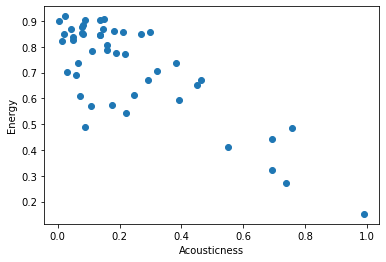

In [19]:
plt.scatter(df["acousticness"], df["energy"])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()